In [5]:
from experiment import *
from cugal.config import SinkhornMethod, HungarianMethod
import os
import torch

λ: 100%|██████████| 15/15 [00:00<00:00, 29.96it/s]


2118623030

 [[Result(ics=0.10164835164835165, ec=0.10164835164835165, sss=0.053545586107091175, accuracy=0.13, profile=Profile(sinkhorn_profiles=[SinkhornProfile(errors=[], iteration_count=11, time=0.01207423210144043), SinkhornProfile(errors=[], iteration_count=11, time=0.004808187484741211), SinkhornProfile(errors=[], iteration_count=11, time=0.0393526554107666), SinkhornProfile(errors=[], iteration_count=21, time=0.021493911743164062), SinkhornProfile(errors=[], iteration_count=21, time=0.009315013885498047), SinkhornProfile(errors=[], iteration_count=21, time=0.010692119598388672), SinkhornProfile(errors=[], iteration_count=11, time=0.00609898567199707), SinkhornProfile(errors=[], iteration_count=11, time=0.00267791748046875), SinkhornProfile(errors=[], iteration_count=11, time=0.011166095733642578), SinkhornProfile(errors=[], iteration_count=11, time=0.011456966400146484), SinkhornProfile(errors=[], iteration_count=31, time=0.04457664489746094), SinkhornProfile(errors=[], iterati

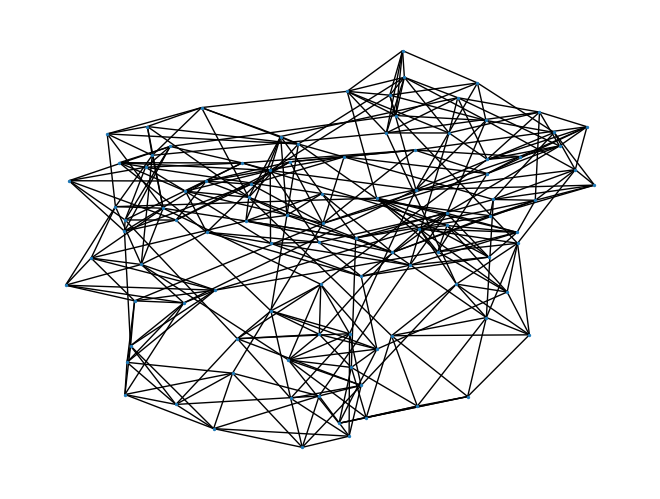

In [6]:
config = Config(
    device='cuda:1', 
    sinkhorn_method=SinkhornMethod.LOG,
    dtype=torch.float32,
    sinkhorn_threshold=1e-3,
    sinkhorn_iterations=500,
    mu=2,
    iter_count=15,
    use_sparse_adjacency=True,
    sinkhorn_cache_size=1,
    frank_wolfe_threshold=0,
    recompute_distance=True,
    hungarian_method=HungarianMethod.DOUBLE_GREEDY,
    )
experiment = Experiment(
    graphs=[
        #Graph(GraphKind.NEWMAN_WATTS, {
        #    'n': 100,
        #    'p': 0.001,
        #    'k': 7,
        #}),
        Graph(GraphKind.PREDEFINED_GRAPHS, {
            'source_file': 'data/MultiMagna/yeast0_Y2H1.txt',
            'target_file': f'data/MultiMagna/yeast{i}_Y2H1.txt',
        }) for i in range(5, 26, 5)
    ],
    algorithms=[
        Algorithm(config, use_fugal=False),
        #Algorithm(config, use_fugal=True),
    ],
    noise_levels=[
        NoiseLevel(0., 0.0, False),
    ],
)
results = experiment.run()

print(experiment.seed)
#[print(res) for res in results.results[:][0]]
[print("\n", res) for res in results.results]

folder = "results"
if not os.path.exists(folder): os.makedirs(folder)
#results.dump(folder)